In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd

import json
import glob
import os

In [2]:
queries = pd.concat((pd.DataFrame.from_records([{ 
    'weight_factor': factor,
    **algo } 
    for algo in json.load(open('/home/zeitz/dev/bmw_routing/engine/{}.json'.format(factor)))['algo_runs'] if algo.get('algo') == 'CH Potentials Query']) for factor in [1.1, 1.2, 1.3, 1.4]))

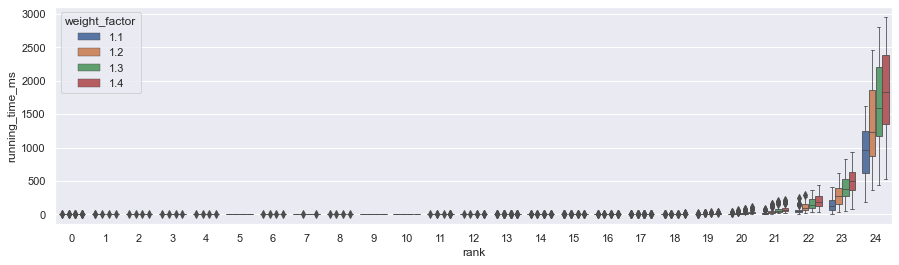

In [3]:
plt.figure(figsize=(15,4))
g = sns.boxplot(data=queries, x='rank', y='running_time_ms', hue='weight_factor', linewidth=0.8)

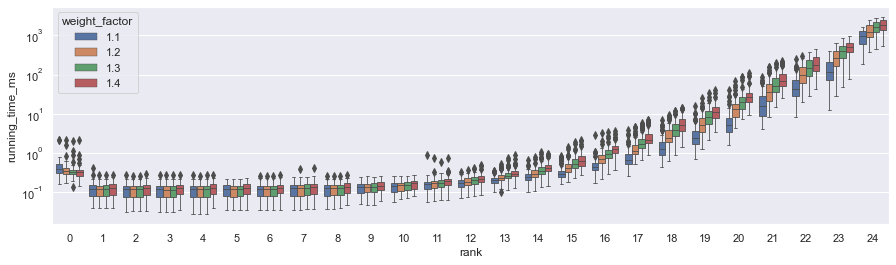

In [4]:
plt.figure(figsize=(15,4))
g = sns.boxplot(data=queries, x='rank', y='running_time_ms', hue='weight_factor', linewidth=0.8)
g.set_yscale('log')

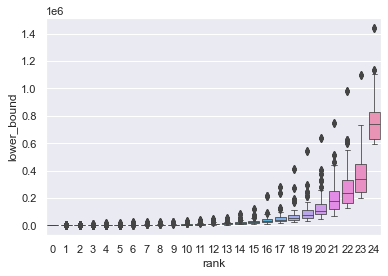

In [5]:
sns.boxplot(data=queries, x='rank', y='lower_bound', linewidth=0.8)

In [6]:
queries['inc_prev_rank'] = queries['lower_bound'].pct_change() + 1

In [7]:
queries.groupby('rank')['inc_prev_rank'].mean()

rank
0     0.000000
1          inf
2     3.604645
3     2.264619
4     1.666067
5     1.538191
6     1.418315
7     1.435947
8     1.415323
9     1.383069
10    1.332360
11    1.334067
12    1.348992
13    1.348142
14    1.316002
15    1.345621
16    1.411936
17    1.328353
18    1.358349
19    1.388760
20    1.425580
21    1.552744
22    1.411686
23    1.415614
24    2.207686
Name: inc_prev_rank, dtype: float64

In [8]:
queries.sort_values('num_queue_pops')

,weight_factor,algo,from,lower_bound,num_pot_evals,num_queue_pops,num_relaxed_arcs,rank,result,running_time_ms,to,inc_prev_rank
0,1.1,CH Potentials Query,8096279,0,3,1,10,0,0,2.158929,8096279,NaN
875,1.2,CH Potentials Query,8172059,0,5,1,10,0,0,0.502327,8172059,0.000000
900,1.2,CH Potentials Query,2704227,0,6,1,10,0,0,0.421471,2704227,0.000000
925,1.2,CH Potentials Query,9576110,0,5,1,11,0,0,0.617791,9576110,0.000000
950,1.2,CH Potentials Query,8316585,0,3,1,9,0,0,0.390122,8316585,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1774,1.4,CH Potentials Query,10203843,804297,4802393,3637465,18316620,24,1124953,2634.729983,15409880,2.207951
1574,1.4,CH Potentials Query,6986891,1056993,4808743,3644840,18170354,24,1478428,2522.370019,16572573,1.683432
99,1.4,CH Potentials Query,6940281,1137252,4813571,3650617,18197399,24,1590560,2737.539665,15546706,1.607821
249,1.4,CH Potentials Query,10198434,802393,4837929,3662774,18444416,24,1122211,2956.500948,17690643,2.213559


In [9]:
queries.loc[lambda x: x['rank'] == 24].loc[lambda x: x['weight_factor'] == 1.4].sort_values('running_time_ms')[-10:]

,weight_factor,algo,from,lower_bound,num_pot_evals,num_queue_pops,num_relaxed_arcs,rank,result,running_time_ms,to,inc_prev_rank
649,1.4,CH Potentials Query,2488641,616333,4268758,3222814,16274581,24,862029,2538.013178,7291787,2.933145
1974,1.4,CH Potentials Query,10179857,756722,4665729,3532861,17798338,24,1058367,2547.454371,16019277,2.364557
974,1.4,CH Potentials Query,8316585,708061,4413797,3337595,16858296,24,990465,2547.468766,16576850,2.506810
49,1.4,CH Potentials Query,17671559,911854,4301438,3284097,16615534,24,1275391,2552.060998,14253643,1.600370
999,1.4,CH Potentials Query,13572732,758430,4585486,3483290,17581960,24,1060750,2557.986419,16019097,2.233712
1774,1.4,CH Potentials Query,10203843,804297,4802393,3637465,18316620,24,1124953,2634.729983,15409880,2.207951
99,1.4,CH Potentials Query,6940281,1137252,4813571,3650617,18197399,24,1590560,2737.539665,15546706,1.607821
399,1.4,CH Potentials Query,10128746,741956,4593872,3475420,17527620,24,1037689,2772.421739,17488530,2.403283
1174,1.4,CH Potentials Query,13671232,821569,5034565,3834196,19152532,24,1149266,2791.443362,12114194,2.030250
249,1.4,CH Potentials Query,10198434,802393,4837929,3662774,18444416,24,1122211,2956.500948,17690643,2.213559


In [10]:
queries.loc[lambda x: x['rank'] == 24].loc[lambda x: x['weight_factor'] == 1.4].sort_values('running_time_ms')[:10]

,weight_factor,algo,from,lower_bound,num_pot_evals,num_queue_pops,num_relaxed_arcs,rank,result,running_time_ms,to,inc_prev_rank
1374,1.4,CH Potentials Query,9481298,738501,1332934,1007797,4998923,24,1033432,524.527297,6891553,2.182977
274,1.4,CH Potentials Query,13887091,868787,1754453,1349015,6649492,24,1215678,742.410794,6873231,1.912360
1999,1.4,CH Potentials Query,14719790,604834,2231218,1698838,8527280,24,845692,993.196489,15792164,2.447888
2499,1.4,CH Potentials Query,737181,605025,2427605,1830906,9115414,24,846310,1041.874033,16438895,2.629869
549,1.4,CH Potentials Query,765979,609081,2315954,1745135,8705818,24,851951,1103.877948,16334236,2.625655
1474,1.4,CH Potentials Query,15315403,600354,2601109,1957353,9792382,24,839819,1183.840275,16455534,2.597777
1124,1.4,CH Potentials Query,15182325,604466,2590112,1948651,9747002,24,845545,1214.927842,16422747,2.567792
1874,1.4,CH Potentials Query,11163932,823675,2786182,2128594,10422925,24,1152234,1220.459971,16412717,1.894220
2349,1.4,CH Potentials Query,10846404,758721,2701624,2063023,10105741,24,1061387,1221.059934,16413128,2.046239
1749,1.4,CH Potentials Query,10624839,747310,2719678,2077337,10174971,24,1045455,1221.554566,16412717,2.079541


In [2]:
factors_fast = pd.read_csv("/home/zeitz/searchspace_inclusion_factors_fast.csv", header=None)[0]

In [4]:
factors_fast.loc[lambda x: x >= 1].describe()

count    1.677722e+07
mean     8.518815e+00
std      1.117977e+03
min      1.000000e+00
25%      1.580391e+00
50%      1.988228e+00
75%      2.766154e+00
max      1.281082e+06
Name: 0, dtype: float64

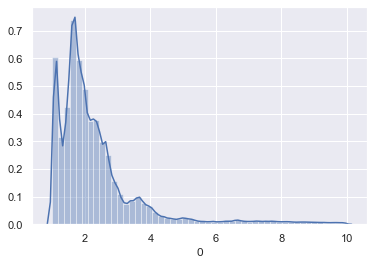

In [6]:
sns.distplot(factors_fast.loc[lambda x: x >= 1].loc[lambda x: x < 10])

In [8]:
factors = pd.read_csv("/home/zeitz/searchspace_inclusion_factors.csv", header=None)[0]

In [9]:
factors.loc[lambda x: x >= 1].describe()

count    1.677722e+07
mean     2.472415e+00
std      1.561161e+02
min      1.000000e+00
25%      1.101243e+00
50%      1.249773e+00
75%      1.910594e+00
max      1.964640e+05
Name: 0, dtype: float64

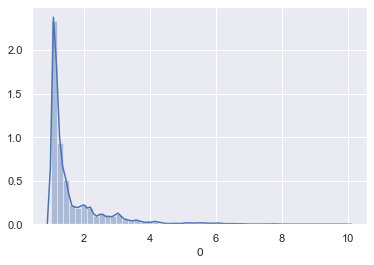

In [10]:
sns.distplot(factors.loc[lambda x: x >= 1].loc[lambda x: x < 10])